In [1]:
#№	Количество кластеров	Количество признаков	Дисперсия значений
#9            4                       2                       1
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda 
from sklearn.metrics import confusion_matrix

# Увеличить количество измеренй, разделить выборку на обучающую и тестовую
# лди и кьюди на тесте
# Показать на иерархическом графике кластеры, к какому кластеру какая ветка принадлежит (Вторым графиком?)
# Confusion matrix в конце каждого метода

N=4 # Число кластеров
D=2 # Число признаков
X,y=make_blobs(n_samples=300,centers=N,n_features=D,random_state=1, cluster_std=2)
df=pd.DataFrame(X)
df['Class']=y
print(df)

             0          1  Class
0    -1.199370   5.930512      0
1    -7.336837  -9.747768      2
2    -2.077348   5.579736      0
3    -1.905340   2.534951      0
4     0.583276   5.224291      0
..         ...        ...    ...
295  -7.038177  -9.542615      2
296 -11.139285 -12.038406      2
297  -4.058096   6.133181      0
298 -13.346104  -2.303289      1
299  -6.413453  -3.305570      3

[300 rows x 3 columns]


K:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


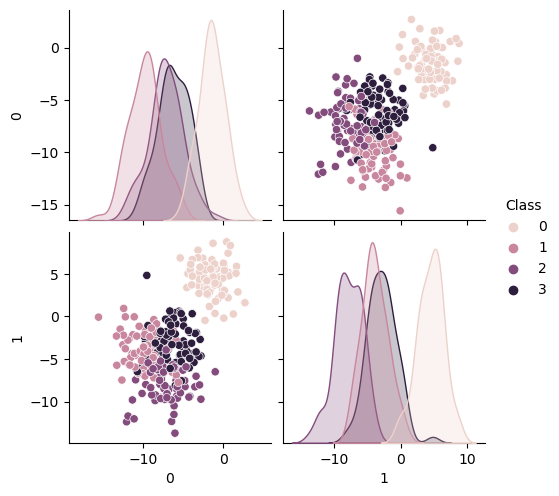

In [2]:
sns.pairplot(df,hue='Class')

In [3]:
sc = StandardScaler()
df_class=df['Class']
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()

,0,1
count,3.000000e+02,3.000000e+02
mean,7.342275e-16,-6.513308e-17
std,1.001671e+00,1.001671e+00
min,-2.623950e+00,-2.282024e+00
25%,-7.282300e-01,-6.957726e-01
50%,-1.036081e-01,-2.025539e-01
75%,7.468147e-01,6.166972e-01
max,2.469189e+00,2.309464e+00


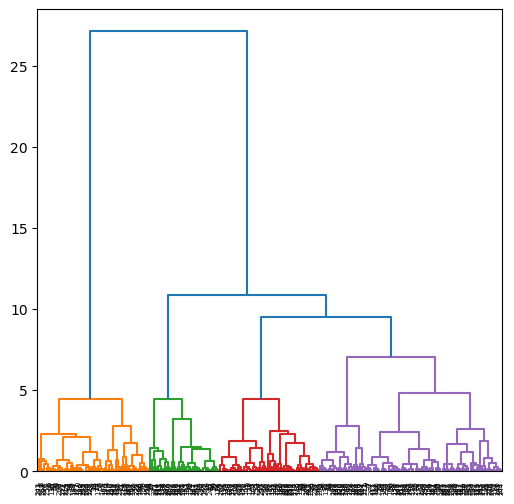

In [4]:
row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='ward')
plt.figure(figsize=(6,6))
dendrogram(mergings, color_threshold=8)
plt.show()

C:\Users\Алемор\AppData\Local\Temp\ipykernel_7196\993217610.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


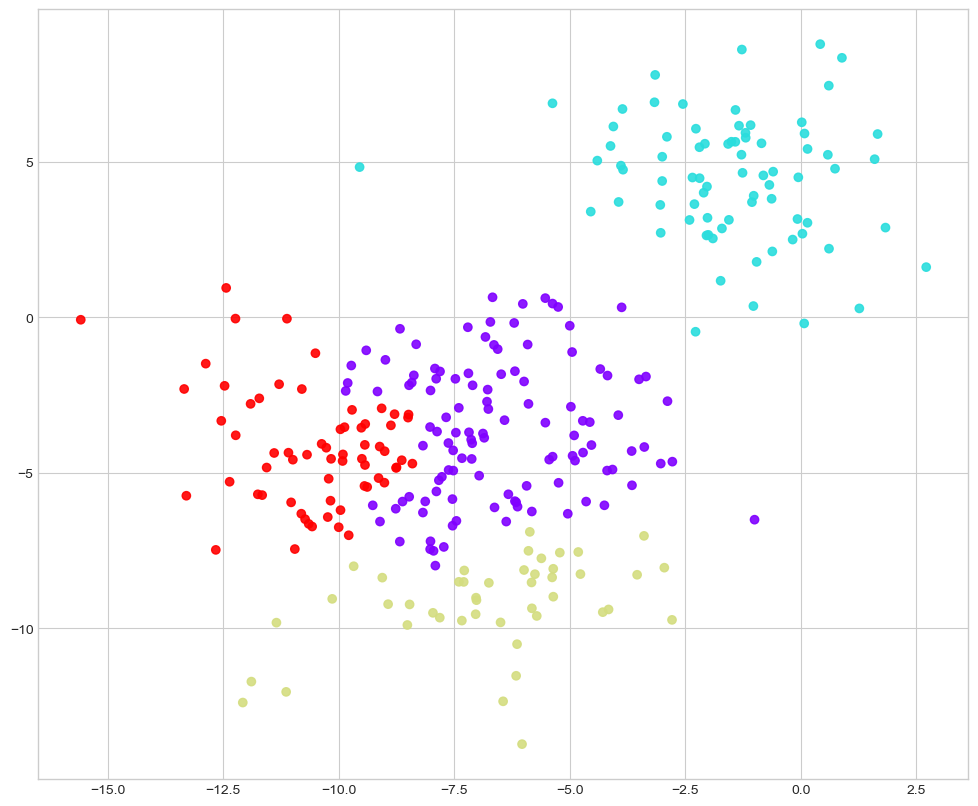

In [5]:
# Огломератив кластеринг
modelA = AgglomerativeClustering(n_clusters=4,  linkage='ward')
modelA.fit(df)
pred = modelA.fit_predict(df)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(df[0], df[1], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

In [6]:
print(confusion_matrix(y, pred))

[[ 0 75  0  0]
 [21  0  2 52]
 [29  0 41  5]
 [65  1  2  7]]


In [7]:
# Разделение выборки на x_train и x_test
X_train, X_test, y_train, y_test = train_test_split(df_t, y, test_size=0.2)

K:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
K:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


-19.948822388620876
[[ 0 14  0  0]
 [17  0  0  4]
 [ 4  0 11  0]
 [ 0  0  0 10]]


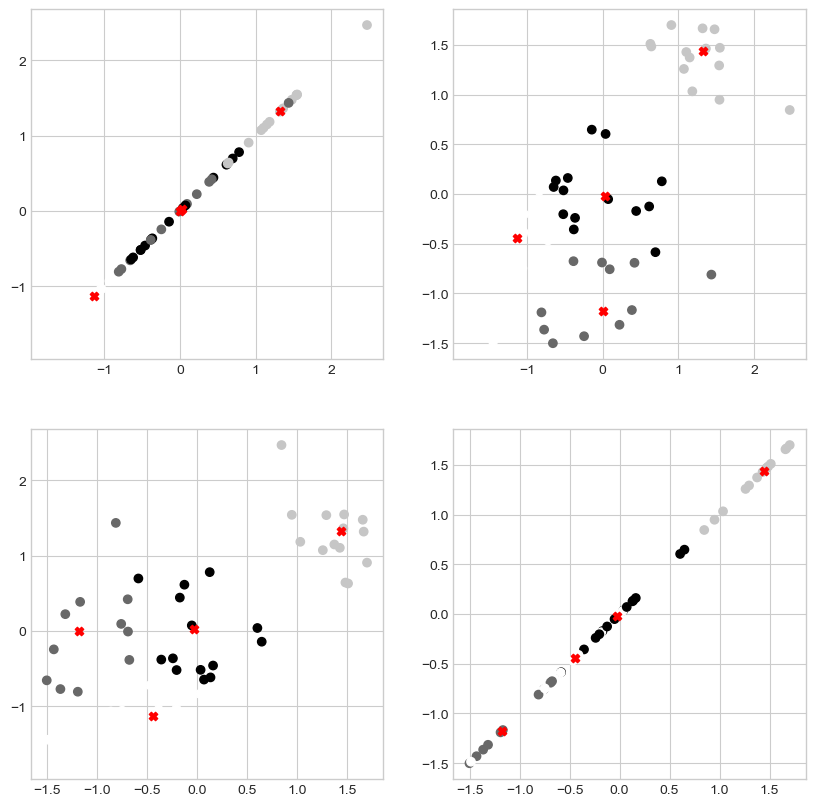

In [8]:
# К-средних
from sklearn.metrics import confusion_matrix
modelK = KMeans(n_clusters=N, max_iter=1000)
modelK.fit(X_train.values) # x_train
pred=modelK.predict(X_test.values) #x_test
print(modelK.score(X_test))
print(confusion_matrix(y_test, pred))
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(X_test[i], X_test[j],c=pred)
        plt.scatter(modelK.cluster_centers_[:,i],modelK.cluster_centers_[:,j], marker='X', c='red')


<class 'list'>


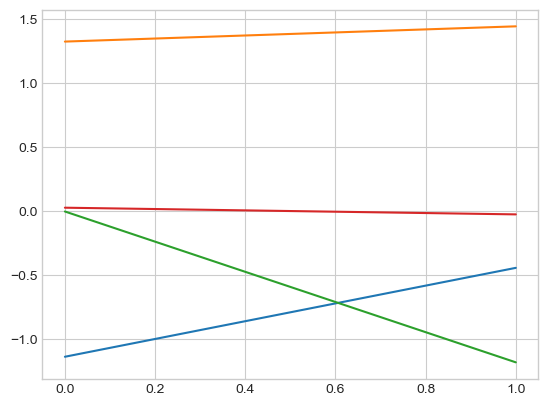

In [9]:
c=modelK.cluster_centers_
print(list)
for i in range(N):
    plt.plot(df_t.columns,c[i],'-')

In [10]:
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    x=X_train[[field1, field2]].values #определим данные
    #df_t['Class']=y_train #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный    
    model=type_model
    #построим модель    
    model.fit(x, y_train)
    #predL = model.predict(X_test.values)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = X_train[0].min()-1, X_train[0].max()+1
    min2, max2 = X_train[1].min()-1, X_train[1].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel2')
    #Выведем значения
    plt.scatter(X_test[field1],X_test[field2],c=y_test, cmap='Set1')
    #оценка точности модели
    X_test_new = X_test[[field1, field2]]
    plt.title(model.score(X_test_new.values,y_test)) 
    return splot

K:\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
K:\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


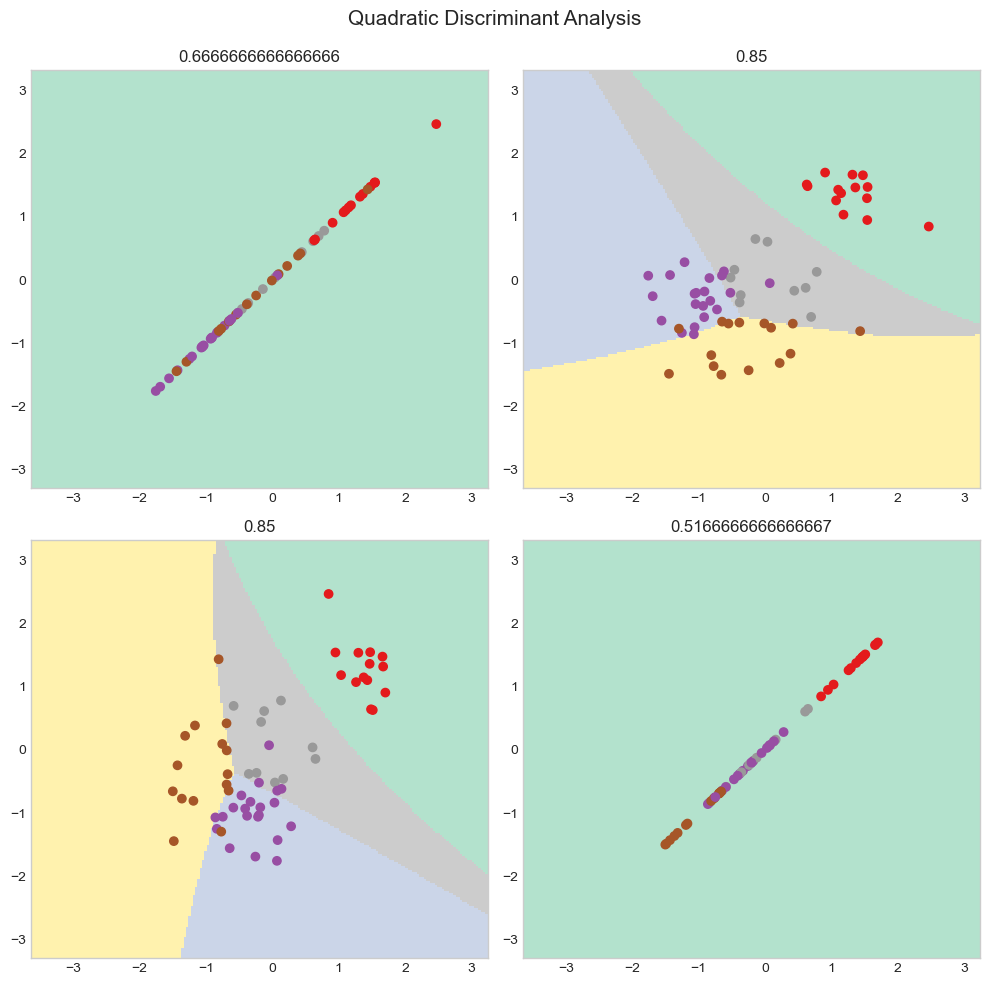

In [11]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis',y=0.98, fontsize=15)
k=0
for i in range(D):
    for j in range (D):
        k=k+1 
        splot=lda_qda(i, j,qda(),k) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

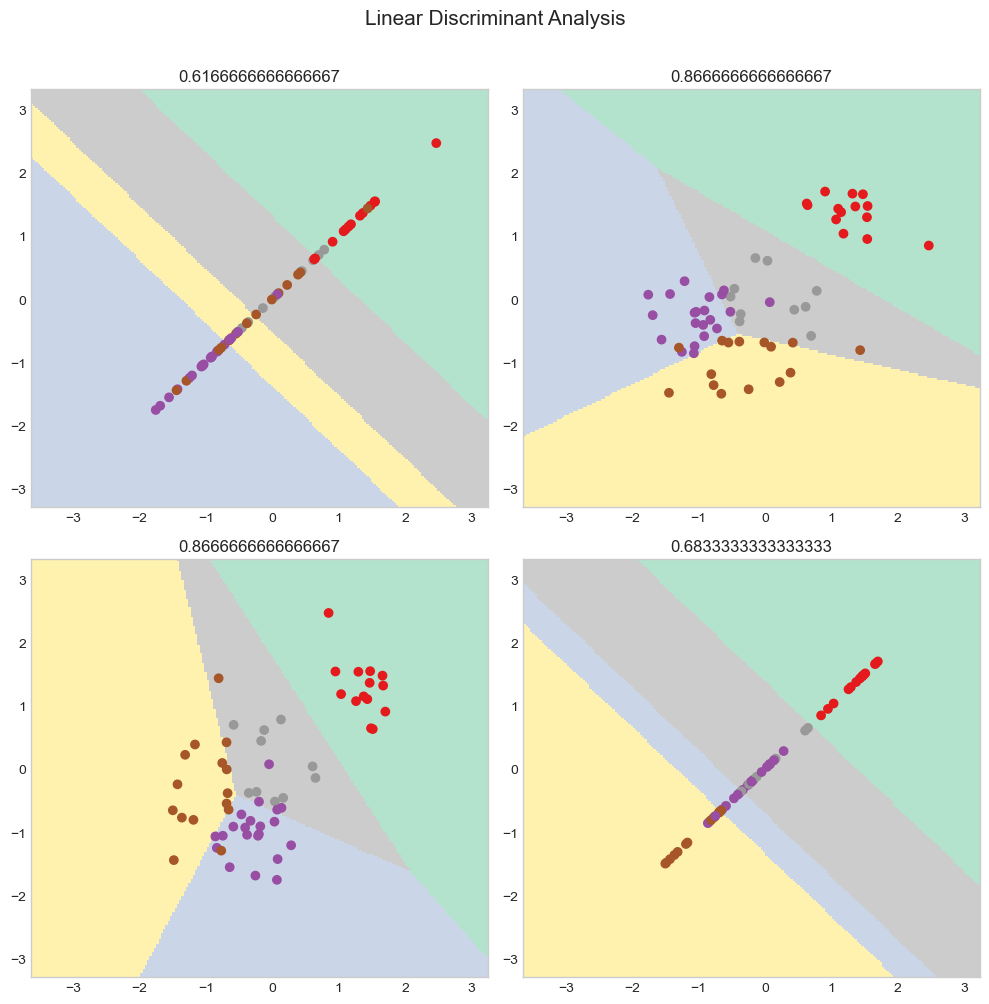

In [12]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis',y=1, fontsize=15)
k=0
for i in range(D):
    for j in range (D):
        k=k+1 
        splot=lda_qda(i, j,lda(),k) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [13]:
model=lda()   
model.fit(X_train, y_train)
pred=model.predict(X_test)
print(confusion_matrix(y_test, pred))
model.score(X_test.values,y_test)

[[14  0  0  0]
 [ 0 17  0  4]
 [ 0  2 11  2]
 [ 0  0  0 10]]


0.8666666666666667

In [14]:
model=qda()   
model.fit(X_train, y_train)
pred=model.predict(X_test)
print(confusion_matrix(y_test, pred))
model.score(X_test.values,y_test)

[[14  0  0  0]
 [ 0 16  1  4]
 [ 0  2 11  2]
 [ 0  0  0 10]]


0.85